In [8]:
import mewpy 
from cobra.io import read_sbml_model 
from mewpy.simulation import get_simulator
from utils import *

import matplotlib.pyplot as plt


# 1. Importing model

In [2]:
model = read_sbml_model("iIT341.xml")
print(model.summary())
print(model.medium)

# Converting model medium (cobrapy format) to environmental conditions (mewpy format):
# {'EX_pime_e': (-10.0, 999999.0), 'EX_pheme_e': (-10.0, 999999.0), 'EX_pi_e': (-999999.0,999999.0), 'EX_fe2_e': (-999999.0,999999.0), 'EX_fe3_e': (-999999.0,999999.0), 'EX_h_e':(-999999.0,999999.0), 'EX_his__L_e': (-10.0,999999.0), 'EX_ile__L_e': (-10.0,999999.0), 'EX_leu__L_e': (-10.0,999999.0), 'EX_met__L_e': (-10.0,999999.0), 'EX_nh4_e': (-999999.0,999999.0), 'EX_o2_e': (-12.0,999999.0), 'EX_so4_e': (-999999.0,999999.0), 'EX_thm_e': (-10.0,999999.0), 'EX_val__L_e': (-10.0,999999.0), 'EX_ala__D_e': (-10.0,999999.0), 'EX_ala__L_e': (-10.0,999999.0), 'EX_arg__L_e': (-10.0,999999.0)}


Objective
1.0 BIOMASS_HP_published = 0.6928126934734458

Uptake
------
Metabolite    Reaction      Flux  C-Number C-Flux
  ala__D_e EX_ala__D_e        10         3 38.15%
  ala__L_e EX_ala__L_e        10         3 38.15%
  arg__L_e EX_arg__L_e     2.151         6 16.41%
       h_e      EX_h_e     3.981         0  0.00%
  his__L_e EX_his__L_e   0.06235         6  0.48%
  ile__L_e EX_ile__L_e    0.1912         6  1.46%
  leu__L_e EX_leu__L_e    0.2965         6  2.26%
  met__L_e EX_met__L_e    0.2054         5  1.31%
      o2_e     EX_o2_e        12         0  0.00%
   pheme_e  EX_pheme_e 4.157E-06        34  0.00%
      pi_e     EX_pi_e     0.642         0  0.00%
    pime_e   EX_pime_e 4.157E-06         7  0.00%
     thm_e    EX_thm_e 4.157E-06        12  0.00%
  val__L_e EX_val__L_e    0.2786         5  1.77%

Secretion
---------
Metabolite    Reaction       Flux  C-Number C-Flux
    amob_c   DM_amob_c -4.157E-06        15  0.00%
  hmfurn_c DM_hmfurn_c   -0.06032         5  0.60%
     

# 2. Model Validation

2.1 Simulating growth under normal conditions

In [3]:
simul =  get_simulator(model.copy())
result = simul.simulate()
print(result)

objective: 0.692812693473426
Status: OPTIMAL
Constraints: OrderedDict()
Method:SimulationMethod.FBA


2.2 Simulating growth under anaerobic conditions

In [4]:
# test under anaerobic conditions

#create environmental conditions
anae_cond = {'EX_pime_e': (-10.0, 999999.0), 'EX_pheme_e': (-10.0, 999999.0), 'EX_pi_e': (-999999.0,999999.0), 'EX_fe2_e': (-999999.0,999999.0), 'EX_fe3_e': (-999999.0,999999.0), 'EX_h_e':(-999999.0,999999.0), 'EX_his__L_e': (-10.0,999999.0), 'EX_ile__L_e': (-10.0,999999.0), 'EX_leu__L_e': (-10.0,999999.0), 'EX_met__L_e': (-10.0,999999.0), 'EX_nh4_e': (-999999.0,999999.0), 'EX_o2_e': (0,999999.0), 'EX_so4_e': (-999999.0,999999.0), 'EX_thm_e': (-10.0,999999.0), 'EX_val__L_e': (-10.0,999999.0), 'EX_ala__D_e': (-10.0,999999.0), 'EX_ala__L_e': (-10.0,999999.0), 'EX_arg__L_e': (-10.0,999999.0)}


simul_ana = get_simulator(model.copy(), envcond=anae_cond)
result_ana = simul_ana.simulate()
print(result_ana)

#No growth = VALIDATED 


objective: 1.92823161414185e-16
Status: OPTIMAL
Constraints: OrderedDict([('EX_pime_e', (-10.0, 999999.0)), ('EX_pheme_e', (-10.0, 999999.0)), ('EX_pi_e', (-999999.0, 999999.0)), ('EX_fe2_e', (-999999.0, 999999.0)), ('EX_fe3_e', (-999999.0, 999999.0)), ('EX_h_e', (-999999.0, 999999.0)), ('EX_his__L_e', (-10.0, 999999.0)), ('EX_ile__L_e', (-10.0, 999999.0)), ('EX_leu__L_e', (-10.0, 999999.0)), ('EX_met__L_e', (-10.0, 999999.0)), ('EX_nh4_e', (-999999.0, 999999.0)), ('EX_o2_e', (0, 999999.0)), ('EX_so4_e', (-999999.0, 999999.0)), ('EX_thm_e', (-10.0, 999999.0)), ('EX_val__L_e', (-10.0, 999999.0)), ('EX_ala__D_e', (-10.0, 999999.0)), ('EX_ala__L_e', (-10.0, 999999.0)), ('EX_arg__L_e', (-10.0, 999999.0))])
Method:SimulationMethod.FBA


2.3 Simulating growth using essential amino acids only

In [5]:
# test with only essential AAs 

#Create environmental conditions:
#remove both alanines -> no sole carbon source (just essential AAs)
# L-arginine  (model name: EX_arg__L_e)
# L-histidine  (model name: EX_his__L_e)
# L-isoleucine (model name: EX_ile__L_e)
# L-leucine (model name: EX_leu__L_e)
# L-methionine (model name: EX_met__L_e)
# L-phenylalanine (model name: EX_phe__L_e)
# L-valine (model name: EX_val__L_e)
# L-alanine (model name: EX_ala__L_e) -> 0 uptake
# D-alanine (model name: EX_ala__D_e) -> 0 uptake

essential_aa_cond = {'EX_pime_e': (-10.0, 999999.0), 'EX_pheme_e': (-10.0, 999999.0), 'EX_pi_e': (-999999.0,999999.0), 'EX_fe2_e': (-999999.0,999999.0), 'EX_fe3_e': (-999999.0,999999.0), 'EX_h_e':(-999999.0,999999.0), 'EX_his__L_e': (-10.0,999999.0), 'EX_ile__L_e': (-10.0,999999.0), 'EX_leu__L_e': (-10.0,999999.0), 'EX_met__L_e': (-10.0,999999.0), 'EX_nh4_e': (-999999.0,999999.0), 'EX_o2_e': (-12.0,999999.0), 'EX_so4_e': (-999999.0,999999.0), 'EX_thm_e': (-10.0,999999.0), 'EX_val__L_e': (-10.0,999999.0), 'EX_ala__D_e': (0.0,999999.0), 'EX_ala__L_e': (0.0,999999.0), 'EX_arg__L_e': (-10.0,999999.0), 'EX_phe__L_e':(-10.0, 999999.0)}

simul_aa = get_simulator(model.copy(), envcond=essential_aa_cond)
result_aa = simul_aa.simulate()
print(result_aa)

#no growth = VALIDATED


objective: 1.0789122661499178e-18
Status: OPTIMAL
Constraints: OrderedDict([('EX_pime_e', (-10.0, 999999.0)), ('EX_pheme_e', (-10.0, 999999.0)), ('EX_pi_e', (-999999.0, 999999.0)), ('EX_fe2_e', (-999999.0, 999999.0)), ('EX_fe3_e', (-999999.0, 999999.0)), ('EX_h_e', (-999999.0, 999999.0)), ('EX_his__L_e', (-10.0, 999999.0)), ('EX_ile__L_e', (-10.0, 999999.0)), ('EX_leu__L_e', (-10.0, 999999.0)), ('EX_met__L_e', (-10.0, 999999.0)), ('EX_nh4_e', (-999999.0, 999999.0)), ('EX_o2_e', (-12.0, 999999.0)), ('EX_so4_e', (-999999.0, 999999.0)), ('EX_thm_e', (-10.0, 999999.0)), ('EX_val__L_e', (-10.0, 999999.0)), ('EX_ala__D_e', (0.0, 999999.0)), ('EX_ala__L_e', (0.0, 999999.0)), ('EX_arg__L_e', (-10.0, 999999.0)), ('EX_phe__L_e', (-10.0, 999999.0))])
Method:SimulationMethod.FBA


2.4 Simulating growth using L-alanine as the sole carbon source

In [6]:
#test with L-alanine as sole carbon source

#Create environmental conditions:
l_ala_cond = {'EX_pime_e': (-10.0, 999999.0), 'EX_pheme_e': (-10.0, 999999.0), 'EX_pi_e': (-999999.0,999999.0), 'EX_fe2_e': (-999999.0,999999.0), 'EX_fe3_e': (-999999.0,999999.0), 'EX_h_e':(-999999.0,999999.0), 'EX_his__L_e': (-10.0,999999.0), 'EX_ile__L_e': (-10.0,999999.0), 'EX_leu__L_e': (-10.0,999999.0), 'EX_met__L_e': (-10.0,999999.0), 'EX_nh4_e': (-999999.0,999999.0), 'EX_o2_e': (-12.0,999999.0), 'EX_so4_e': (-999999.0,999999.0), 'EX_thm_e': (-10.0,999999.0), 'EX_val__L_e': (-10.0,999999.0), 'EX_ala__D_e': (0.0,999999.0), 'EX_ala__L_e': (-10.0,999999.0), 'EX_arg__L_e': (-10.0,999999.0), 'EX_phe__L_e':(-10.0, 999999.0)}

simul_l_ala = get_simulator(model.copy(), envcond=l_ala_cond)
result_l_ala = simul_l_ala.simulate()
print(result_l_ala)


objective: 0.6221652124983721
Status: OPTIMAL
Constraints: OrderedDict([('EX_pime_e', (-10.0, 999999.0)), ('EX_pheme_e', (-10.0, 999999.0)), ('EX_pi_e', (-999999.0, 999999.0)), ('EX_fe2_e', (-999999.0, 999999.0)), ('EX_fe3_e', (-999999.0, 999999.0)), ('EX_h_e', (-999999.0, 999999.0)), ('EX_his__L_e', (-10.0, 999999.0)), ('EX_ile__L_e', (-10.0, 999999.0)), ('EX_leu__L_e', (-10.0, 999999.0)), ('EX_met__L_e', (-10.0, 999999.0)), ('EX_nh4_e', (-999999.0, 999999.0)), ('EX_o2_e', (-12.0, 999999.0)), ('EX_so4_e', (-999999.0, 999999.0)), ('EX_thm_e', (-10.0, 999999.0)), ('EX_val__L_e', (-10.0, 999999.0)), ('EX_ala__D_e', (0.0, 999999.0)), ('EX_ala__L_e', (-10.0, 999999.0)), ('EX_arg__L_e', (-10.0, 999999.0)), ('EX_phe__L_e', (-10.0, 999999.0))])
Method:SimulationMethod.FBA


Comparing all growths


Text(0.5, 0, 'Enviromental Conditions')

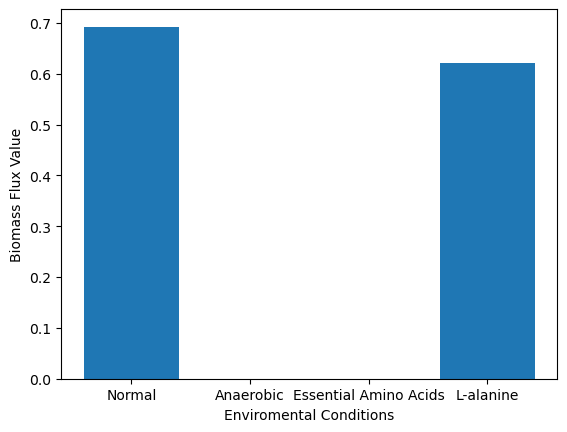

In [88]:
conditions = ["Normal", "Anaerobic", "Essential Amino Acids", "L-alanine"]
growths = [result.objective_value, result_ana.objective_value, result_aa.objective_value, result_l_ala.objective_value]

plt.bar(conditions, growths)
plt.ylabel("Biomass Flux Value")
plt.xlabel("Enviromental Conditions")


# 3. Drug Target Identification and Validation

- Finding list of essential genes

In [7]:
essential_genes=simul.essential_genes(min_growth=0.01)
print(len(essential_genes))

100%|██████████| 339/339 [00:02<00:00, 156.40it/s]

193


- Safety - BLAST against human proteome 

In [ ]:
#finding protein sequence of targets and converting to fasta file
proteome = find_protein_seq(essential_genes)
#creating fasta file FastaEssential.fasta
write_fasta(proteome, "FastaEssential.fasta")
#fasta file will then be used for blast against human 
blast("FastaEssential.fasta")
#finding genes with no hits
no_hits = find_non_homologous('result_file.xml',  100000000)
#finding protein sequence of genes with no hits
no_hits_proteome = find_protein_seq(no_hits)
#creating fasta file no_hits
write_fasta(no_hits_proteome, "no_hits_genes.fasta")

- Finding Targets with Existing Drugs in DrugBank

In [ ]:
def blast_main():
    ids = []
    prot_id = retrieve_id('no_hits_genes.fasta')
    prot_id_db = hits_drug_bank('drug_bank_results.txt')
    prot_id_accepted = hits_drug_bank('drug_bank_final_blast.txt')
    ids.extend(prot_id, prot_id_db, prot_id_accepted)
    for id in ids:
        print(f'Number of proteins: {len(id)}')  # 115 hits that don't have results against the human proteome

    write_fasta(find_protein_seq(prot_id_db),'db_protein_sequences.fasta') # fasta file with only the sequences of the 74 hits
    write_fasta(find_protein_seq(prot_id_accepted),'only_accepted_targets.fasta') 

blast_main()

- Gene essentiality Validation

In [45]:

final_targets = ["HP0195", "HP0663", "HP0642", "HP1161"]
#getting list of experimentally validated genes
validated_genes = read_table_genes_to_validate("Helicobacter pylori 26695_genes.csv")
#finding whcg targets are validated
validated_final_targets = [target for target in final_targets if target in validated_genes.unique()]
print(validated_final_targets)


['HP0663', 'HP1161']
